# Transmission FTIR Spectra

- This Jupyter notebook provides an example workflow for processing transmission FTIR spectra through PyIRoGlass. 

- The Jupyter notebook and data can be accessed here: https://github.com/SarahShi/PyIRoGlass/blob/main/docs/examples/transmission_ftir/. 

- You need to have the PyIRoGlass PyPi package on your machine once. If you have not done this, please uncomment (remove the #) symbol and run the cell below. 

In [ ]:
#!pip install PyIRoGlass

# Load Python Packages and Data

## Load Python Packages

In [1]:
# Import packages

import os
import sys
import glob
import numpy as np
import pandas as pd

sys.path.append('../../../src/')
import PyIRoGlass as pig

from IPython.display import Image

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc, cm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pig.__version__

'0.4.1'

## Set paths to data

In [2]:
# Change paths to direct to folder with transmission FTIR spectra 

TRANS_PATHS = 'SPECTRA/'
print(TRANS_PATHS)

CHEMTHICK_PATH = 'ChemThick.csv'
print(CHEMTHICK_PATH)

SPECTRA/
ChemThick.csv


## Set desired output file directory name

In [3]:
# Change to be what you want the prefix of your output files to be. 
OUTPUT_PATH = 'RESULTS'
print(OUTPUT_PATH)

RESULTS


## Load transmission FTIR spectra and Chemistry Thickness Data

The file names from the spectra (what comes before the .CSV) are important when we load in melt compositions and thicknesses. Unique identifiers identify the same samples. Make sure that this ChemThick.CSV file has the same sample names as the spectra you load in. 

In [4]:
# Load the path to transmission FTIR spectra

loader = pig.SampleDataLoader(spectrum_path=TRANS_PATHS, chemistry_thickness_path=CHEMTHICK_PATH, export_path=OUTPUT_PATH)
DFS_FILES, DFS_DICT, CHEMISTRY, THICKNESS, EXPORT_PATH, DATA_EXPORT_PATH = loader.load_all_data()


Print the name of all files in the directory 

In [5]:
DFS_FILES

['AC4_OL49_021920_30x30_H2O_a',
 'AC4_OL53_101220_256s_30x30_a',
 'STD_D1010_012821_256s_100x100_a']

Let's look at what a dictionary of transmission FTIR spectra look like. Samples are identified by their file names and the wavenumber and absorbance data are stored for each spectrum. 

In [6]:
DFS_DICT

{'AC4_OL49_021920_30x30_H2O_a':             Absorbance
 Wavenumber            
 1000.917      6.000000
 1002.845      6.000000
 1004.774      3.212358
 1006.702      6.000000
 1008.631      3.550053
 ...                ...
 5490.577      0.658218
 5492.505      0.657289
 5494.434      0.657169
 5496.362      0.658473
 5498.291      0.660256
 
 [2333 rows x 1 columns],
 'AC4_OL53_101220_256s_30x30_a':             Absorbance
 Wavenumber            
 1000.916      6.000000
 1002.845      2.809911
 1004.774      2.584419
 1006.702      2.808356
 1008.631      3.712419
 ...                ...
 5490.576      0.118337
 5492.505      0.117460
 5494.433      0.117553
 5496.362      0.117506
 5498.291      0.116924
 
 [2333 rows x 1 columns],
 'STD_D1010_012821_256s_100x100_a':             Absorbance
 Wavenumber            
 1000.916      3.844739
 1002.845      3.630789
 1004.774      6.000000
 1006.702      6.000000
 1008.631      6.000000
 ...                ...
 5490.576      0.394656
 5492.

Display the dataframe of glass compositions

In [7]:
CHEMISTRY

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5
Sample,,,,,,,,,,,
AC4_OL49_021920_30x30_H2O_a,52.34,1.04,17.92,1.93,7.03,0.20,3.63,7.72,4.25,0.78,0.14
AC4_OL53_101220_256s_30x30_a,47.95,1.00,18.88,2.04,7.45,0.19,4.34,9.84,3.47,0.67,0.11
STD_D1010_012821_256s_100x100_a,51.41,1.26,16.58,0.00,7.58,0.00,7.57,10.98,3.01,0.37,0.18


Display the dataframe of wafer thicknesses

In [8]:
THICKNESS

,Thickness,Sigma_Thickness
Sample,,
AC4_OL49_021920_30x30_H2O_a,91.25,3
AC4_OL53_101220_256s_30x30_a,39.00,3
STD_D1010_012821_256s_100x100_a,231.00,3


See that the sample names of the spectra in the dictionary, glass compositions and thicknesses in the dataframe all align. 

# We're ready to roll -- MCMC, here we come! 

We use the function Run_All_Spectra, which takes in two arguments: 

- Dictionary of spectra
- Desired output directory name, or `None` to prevent figure generation. 

Running this code will take a few minutes per spectra, as it is fitting $\mathrm{10^6}$ baselines and peaks to your spectrum to sample uncertainty. If any samples fail, they will be returned in the list FAILURES. 

Save this file as a CSV, so you have this information. We will also use this dataframe to calculate concentration. 

In [9]:
DF_OUTPUT, FAILURES = pig.calculate_baselines(DFS_DICT, EXPORT_PATH)
DF_OUTPUT.to_csv('DF.csv')


::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
  Multi-core Markov-chain Monte Carlo (mc3).
  Version 3.1.3.
  Copyright (c) 2015-2024 Patricio Cubillos and collaborators.
  mc3 is open-source software under the MIT license (see LICENSE).
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Least-squares best-fitting parameters:
  [ 1.10404703e+00 -1.05049335e+00  9.37626609e-01 -9.34063626e-02
  3.00000000e-01  1.42799222e+03  2.88533201e+01  1.09429137e-01
  1.51747427e+03  3.56110384e+01  1.06864326e-01  6.58349188e-01
  1.12132094e-01  4.47459570e-02 -3.10092217e-04  1.23382530e+00]

Yippee Ki Yay Monte Carlo!
Start MCMC chains  (Mon Feb 26 23:13:55 2024)

[:         ]  10.0% completed  (Mon Feb 26 23:13:58 2024)
Out-of-bound Trials:
[    0     0     0     0 12548     0     0    15     0    28    26     0
     0     0     0     0]
Best Parameters: (chisq=367.7173)
[ 1.10404703e+00 -1.05049335e+00  9.37626609e-01 -9.34063626e-02
  3.000000

It took 3 minutes to process 3 spectra on my Macbook Pro 2.6 GHz 6-Core Intel Core i7. It takes about 7.5 minutes to process 3 spectra on Google Colab, given the presence of fewer cpus. 

Run_All_Spectra returns a dataframe of outputs. Let's look at what's included. 

In [10]:
DF_OUTPUT

,PH_3550_M,PH_3550_STD,H2Ot_3550_MAX,BL_H2Ot_3550_MAX,H2Ot_3550_SAT,PH_1635_BP,PH_1635_STD,PH_1515_BP,PH_1515_STD,P_1515_BP,...,PC4_BP,PC4_STD,m_BP,m_STD,b_BP,b_STD,PH_1635_PC1_BP,PH_1635_PC1_STD,PH_1635_PC2_BP,PH_1635_PC2_STD
AC4_OL49_021920_30x30_H2O_a,2.17225,0.002212,2.649837,0.459859,*,0.658349,0.003075,0.106864,0.003618,1517.474274,...,0.300000,0.023017,-0.000310,0.000068,1.233825,0.021302,0.112132,0.016193,0.044746,0.020452
AC4_OL53_101220_256s_30x30_a,1.523343,0.003309,1.631044,0.135541,-,0.299675,0.003062,0.053060,0.003676,1519.233464,...,0.226249,0.042271,-0.000445,0.000076,0.721255,0.023017,-0.052546,0.016397,0.046798,0.017608
STD_D1010_012821_256s_100x100_a,2.710894,0.001587,2.915508,0.206641,*,0.173487,0.003056,0.075560,0.003349,1522.975358,...,0.178618,0.023738,-0.000232,0.000015,2.462353,0.006594,0.076658,0.016476,-0.027977,0.021748


We can look at all the columns in this dataframe, given the size. 

In [11]:
DF_OUTPUT.columns

Index(['PH_3550_M', 'PH_3550_STD', 'H2Ot_3550_MAX', 'BL_H2Ot_3550_MAX',
       'H2Ot_3550_SAT', 'PH_1635_BP', 'PH_1635_STD', 'PH_1515_BP',
       'PH_1515_STD', 'P_1515_BP', 'P_1515_STD', 'STD_1515_BP', 'STD_1515_STD',
       'PH_1430_BP', 'PH_1430_STD', 'P_1430_BP', 'P_1430_STD', 'STD_1430_BP',
       'STD_1430_STD', 'PH_5200_M', 'PH_5200_STD', 'PH_4500_M', 'PH_4500_STD',
       'STN_P5200', 'ERR_5200', 'STN_P4500', 'ERR_4500', 'AVG_BL_BP',
       'AVG_BL_STD', 'PC1_BP', 'PC1_STD', 'PC2_BP', 'PC2_STD', 'PC3_BP',
       'PC3_STD', 'PC4_BP', 'PC4_STD', 'm_BP', 'm_STD', 'b_BP', 'b_STD',
       'PH_1635_PC1_BP', 'PH_1635_PC1_STD', 'PH_1635_PC2_BP',
       'PH_1635_PC2_STD'],
      dtype='object')

All columns with the prefix of PH represent a peak height. All columns with the suffix of _M represent the mean value, and the suffix of _STD represents 1 $\sigma$. 

The column H2OT_3550_SAT? returns a - if the sample is not saturated, and a * if the sample is saturated. This is based on the maximum absorbance of the peak, and the warning of * indicates that we must consider the concentrations more. The following functions calculating concentration handle this and will suggest best values to use. 

The columns S2N_P5200 and S2N_P4500 represent the signal to noise ratios for the $\mathrm{H_2O_{m,5200}}$ and $\mathrm{OH^-_{4500}}$ peaks. If the values are greater than 4, indicating that the signal is meaningful, the ERR_5200 and ERR_4500 peaks return a - value. If signal-to-noise is too low, the warning of * is returned. 

The columns after describe the fitting parameters for generating the baseline and the $\mathrm{H_2O_{m,1635}}$ peak, so you can generate the baseline yourself. 

# Outputs

Quite few figures, log files, and npz files are generated by Run_All_Spectra, assuming you provide an export path and not just the value of `None`. Let's look at a few of them together. 

PyIRoGlass creates this figure for visualizing how each peak within the 1000-5500 cm${^{-1}}$ is fit, with their peak heights shown. 

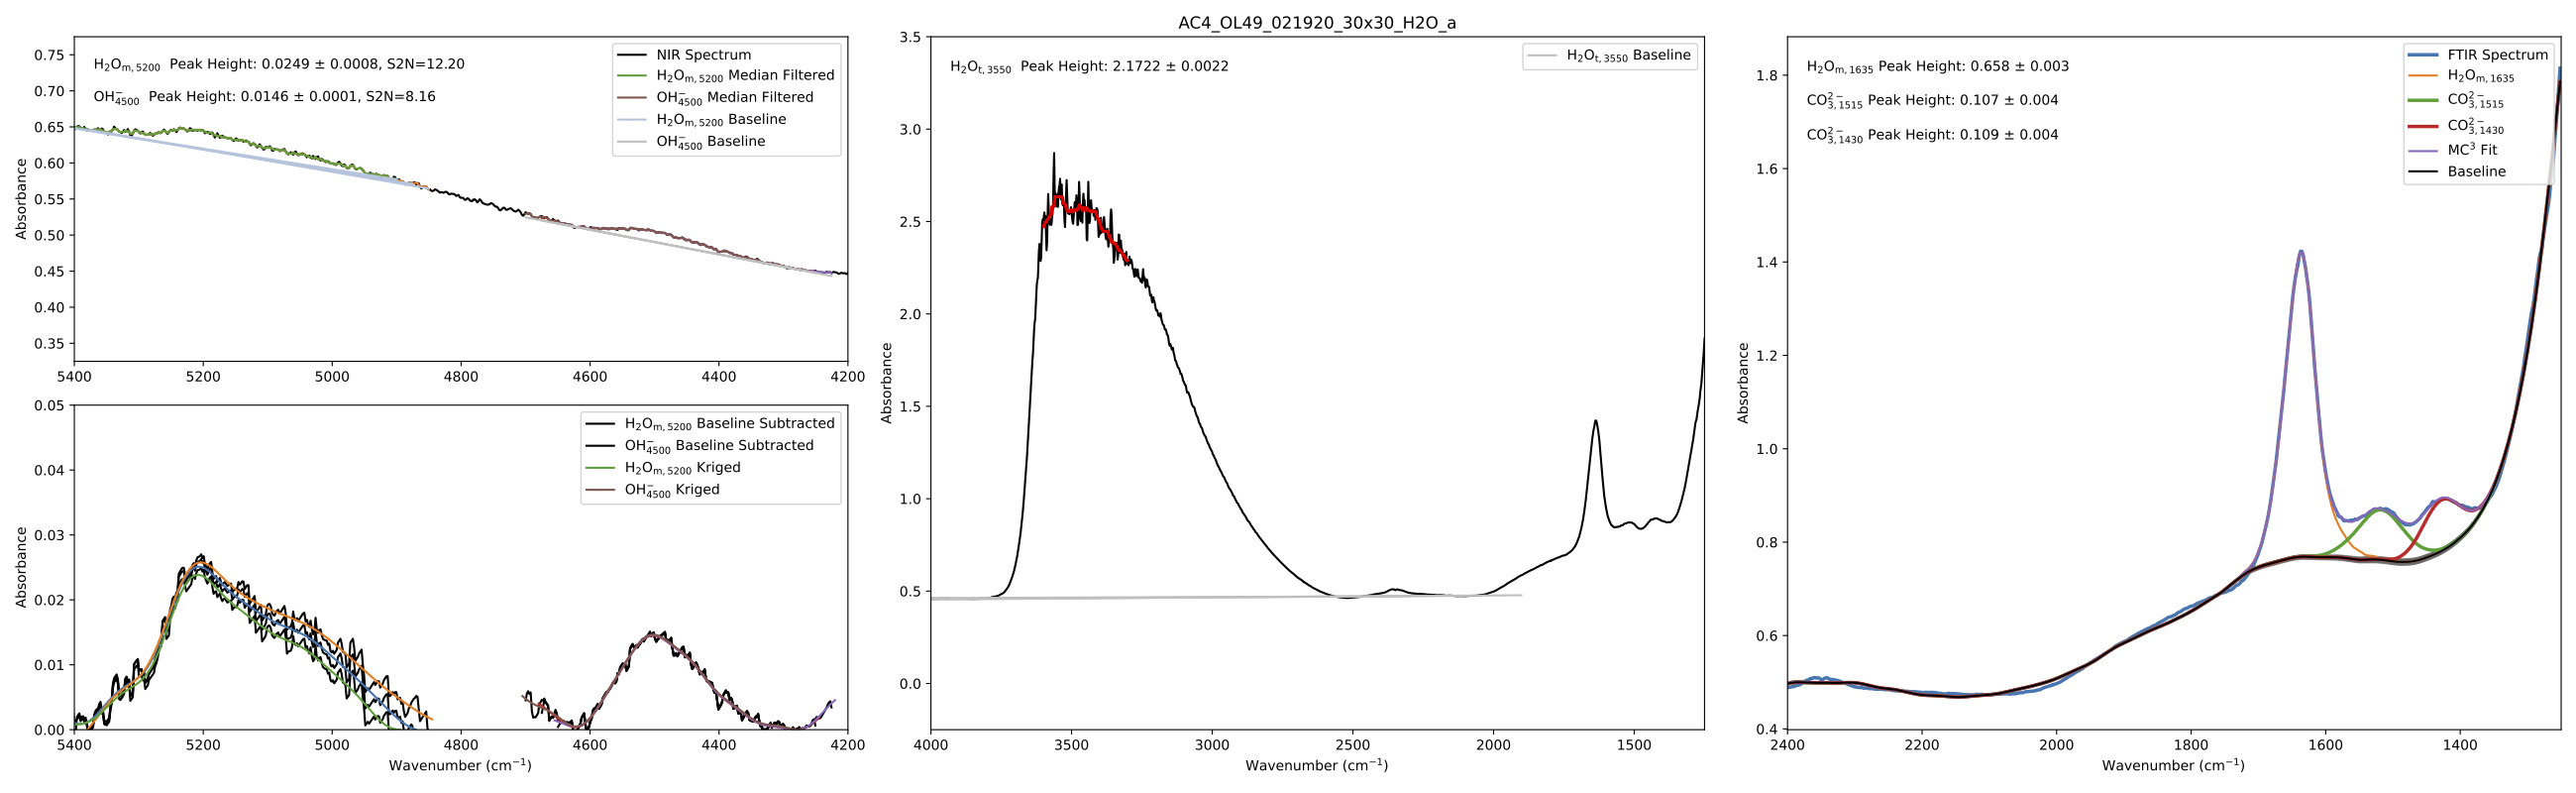

In [12]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/_static/AC4_OL49_021920_30x30_H2O_a.png")

We can visualize how well PyIRoGlass does in fitting this transmission FTIR spectrum, with the modelfit figure. This plots the fit from $\mathrm{MC^3}$ against the transmission FTIR spectrum, with the residual in fit. 

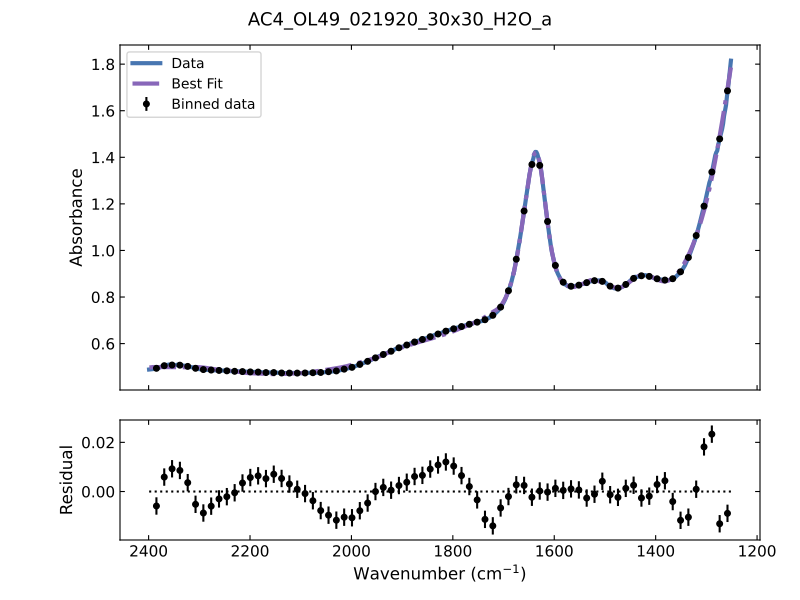

In [13]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/_static/AC4_OL49_021920_30x30_H2O_a_modelfit.png")

The histogram figure shows the distribution of posterior probability densities, with the mean value displayed in the navy dashed line. The shaded region represents the 68% confidence interval around the value. 

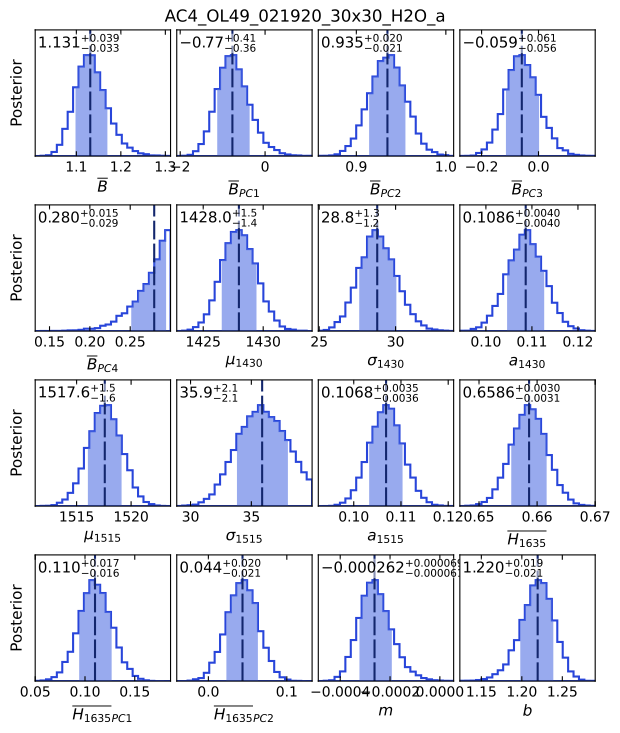

In [14]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/_static/AC4_OL49_021920_30x30_H2O_a_histogram.png")

The pairwise figure plots the posterior probability density distribution for the 16 fitting parameters of Equation 10, allowing for the visualization of covariance within the parameters. Accounting for covariance allows us to properly account for uncertainty. 

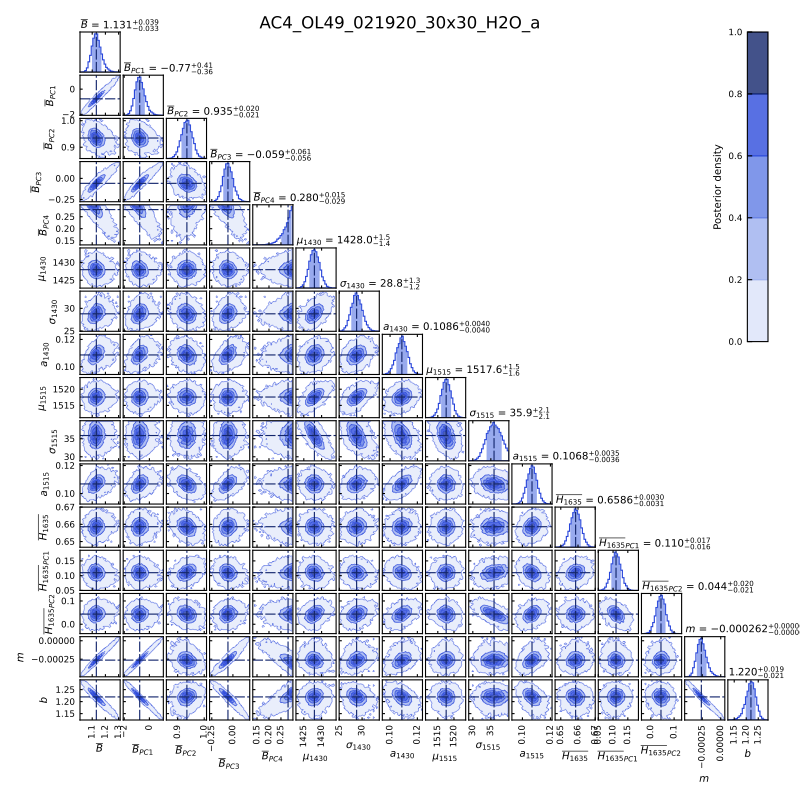

In [15]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/_static/AC4_OL49_021920_30x30_H2O_a_pairwise.png")

The trace figure shows how the parameters evolve through MCMC sampling. 

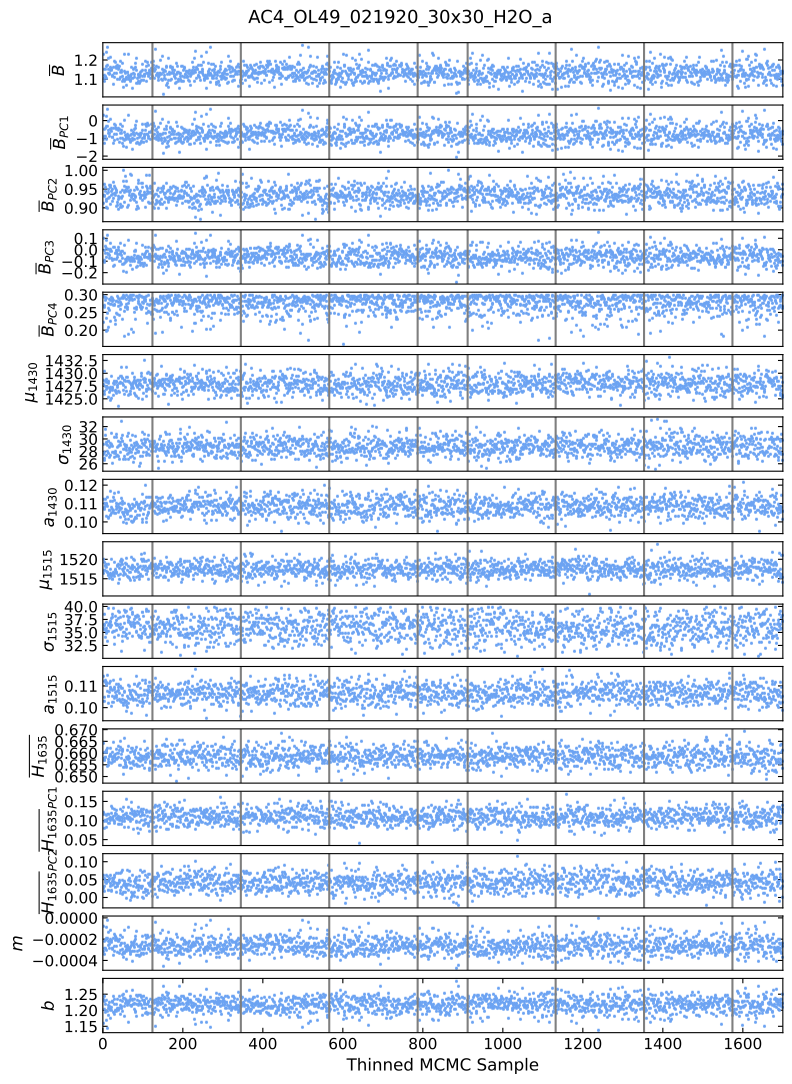

In [16]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/_static/AC4_OL49_021920_30x30_H2O_a_trace.png")

## LOG and NPZ

.log files record the performance of the MCMC algorithm through the samples, and the best parameters at each 10% increment. These are shown above. 

.npz files store all the best-parameters, sampled parameters, etc. in a ready-to-use NumPy format. 

We won't open these here, but these are quite useful to review! 

# Concentrations

We now want to convert all those peak heights (with uncertainties) to concentrations (with uncertainties), by applying the Beer-Lambert Law. We do so by using the calculate_concentrations function, which takes in these parameters and samples over N samples for a secondary MCMC: 

- DF_OUTPUT: Output from Run_All_Spectra
- N: Number of samples for this MCMC
- THICKNESS: Wafer thickness loaded from ChemThick
- CHEMISTRY: Glass composition loaded from ChemThick
- T_ROOM: Room temperature at time of FTIR analysis, given the sensitivity of density to T. 
- P_ROOM: Room pressure at time of FTIR analysis, given the sensitivity of density to P. 


In [17]:
T_ROOM = 25 # C
P_ROOM = 1 # Bar

N = 500000 # MCMC samples
concentrations_df = pig.calculate_concentrations(DF_OUTPUT, CHEMISTRY, THICKNESS)

concentrations_df.to_csv('FINALDATA/H2OCO2.csv')

TypeError: 'int' object does not support item assignment

We're all done now! Let's print your results. 

In [ ]:
concentrations_df

There are a few things to note. Each column with the suffix _MEAN represents the mean value, _BP represents the best-parameter from MCMC, and _STD represents the standard deviation. We recommend the use of the 'H2OT_MEAN', 'H2OT_STD', 'CO2_MEAN', and 'CO2_STD' columns. The columns with the suffix _STN show the signal-to-noise ratio of the NIR peaks, and the columns with the prefix ERR_ just process this information, returning a '-' if the peaks are meaningful and a '*' if the signal is too low. 

Concentrations of $\mathrm{H_2O}$ depend on whether your sample is saturated or not. If your sample is unsaturated (marked by H2OT_3550_SAT == '-'), the column 'H2OT_MEAN'=='H2OT_3550_M'. If your sample is saturated (marked by H2OT_3550_SAT == '*'), the column of 'H2OT_MEAN'=='H2Om_1635_BP'+'OH_4500_M'. The $\mathrm{H_2O_{t, 3550}}$ peak cannot be used, given potential nonlinearity in the Beer-Lambert Law. See the discussion of this handling of speciation in the paper. 


The column 'Density' contains the densities used for the final concentration. The values between 'Density' and 'Density_Sat' will be different if the sample is saturated, showing the difference in densities when using variable concentrations of $\mathrm{H_2O_m}$. 

'Tau' and 'Eta' calculate the compositional parameters required for determining molar absorptivity. All calculated molar absorptivities and their uncertainties (sigma_ prefix) from the inversion are provided in the dataframe. 
